In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
original_image = cv2.imread("images/image1.png", cv2.IMREAD_GRAYSCALE)

border_size = 2
borderedImage = cv2.copyMakeBorder(original_image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=0)

filters = [
    np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]),
    np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 1]]),
    np.array([[0, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 0], [0, 0, 0, 0, 0]]),
    np.array([[0, 0, 0, 0, 0], [0, 0.5, 0.5, 0.5, 0], [0, 0.5, 0.5, 0.5, 0], [0, 0.5, 0.5, 0.5, 0], [0, 0, 0, 0, 0]])
]

(-0.5, 351.5, 281.5, -0.5)

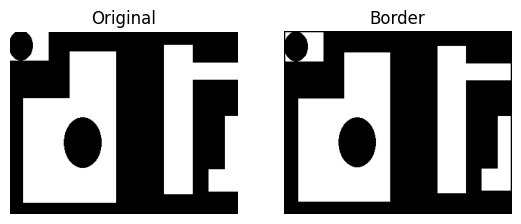

In [11]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.title("Original")
plt.imshow(original_image, cmap="gray")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.title("Border")
plt.imshow(borderedImage, cmap="gray")
plt.axis("off")


In [4]:
original_image.shape, borderedImage.shape, filters[0].shape

((278, 348), (282, 352), (5, 5))

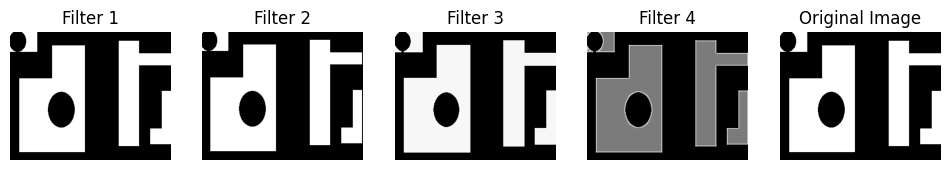

In [3]:
def manual_convolution(image, filter):
  result = np.zeros_like(image)
  for i in range(border_size, image.shape[0] - border_size):
    for j in range(border_size, image.shape[1] - border_size):
      result[i, j] = np.sum(image[i-border_size:i+border_size+1, j-border_size:j+border_size+1] * filter)
  return result[border_size:-border_size, border_size:-border_size]

results = [manual_convolution(borderedImage, filt) for filt in filters]

plt.figure(figsize=(12, 4))
for i in range(4):
  plt.subplot(1, 5, i+1)
  plt.imshow(results[i], cmap='gray')
  plt.title(f'Filter {i+1}')
  plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.show()

In [92]:
class Gauss:
    def __init__(self, sigma, k=1):
        self.sigma = sigma
        self.k = k
    
    def __call__(self, x, y):
        return np.exp(-(x**2 + y**2) / (2 * self.sigma**2)) / (2 * np.pi * self.sigma**2)
    
    def generate(self):
        return np.array([[self(x, y) for x in range(-self.k//2, self.k//2+1)] for y in range(-self.k//2, self.k//2+1)])

In [93]:
img = np.resize(original_image, (5, 5))

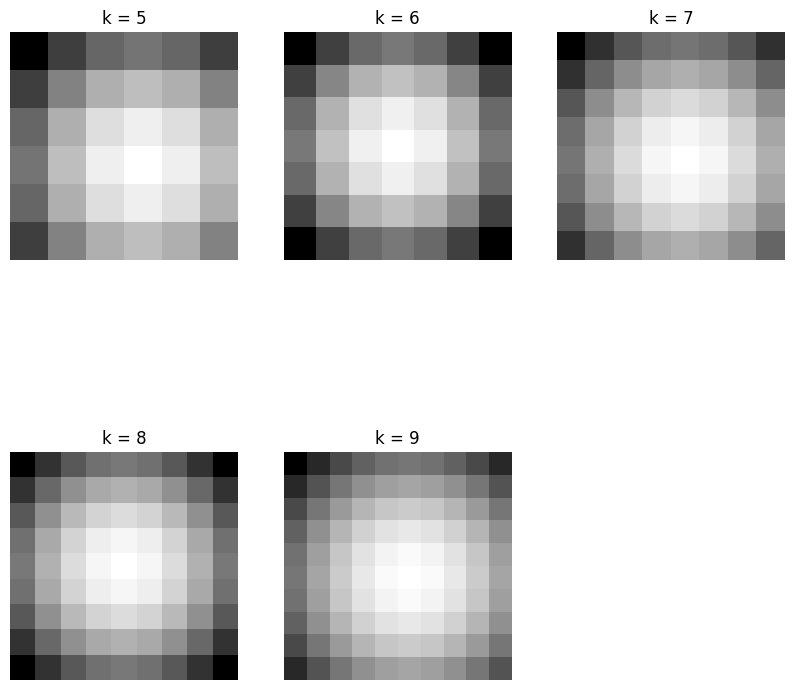

In [96]:
plt.figure(figsize=(10, 10))

ks = np.arange(5, 10)

for i, k in enumerate(ks):
    plt.subplot(2, 3, i+1)
    plt.title(f'k = {k}')
    plt.imshow(Gauss(k, k).generate(), cmap='gray')
    plt.axis('off')
    
plt.show()